In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

In [5]:
num_cols = ['Age', 'Fare']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

In [6]:
df['Survived'] = df['Survived'].map({0: 'No', 1: 'Yes'})

In [7]:
df['Pclass'] = df['Pclass'].map({1: 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

In [8]:
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0]).astype('category')

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,Second Class,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Yes,First Class,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,No,Third Class,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Yes,First Class,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


EDA

In [10]:
df.shape

(891, 12)

In [11]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
382,383,No,Third Class,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
723,724,No,Second Class,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
434,435,No,First Class,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
359,360,Yes,Third Class,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
425,426,No,Third Class,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 48.3+ KB


In [13]:
for c in df.select_dtypes(include='category').columns:
    print(f"\nValue counts — {c}")
    print(df[c].value_counts(dropna=False))


Value counts — Survived
Survived
No     549
Yes    342
Name: count, dtype: int64

Value counts — Pclass
Pclass
Third Class     491
First Class     216
Second Class    184
Name: count, dtype: int64

Value counts — Sex
Sex
male      577
female    314
Name: count, dtype: int64

Value counts — SibSp
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Value counts — Parch
Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: count, dtype: int64

Value counts — Embarked
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
df['Cabin'] = df['Cabin'].fillna('No')

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,Yes,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,Second Class,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,No,S
887,888,Yes,First Class,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,No,Third Class,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,No,S
889,890,Yes,First Class,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


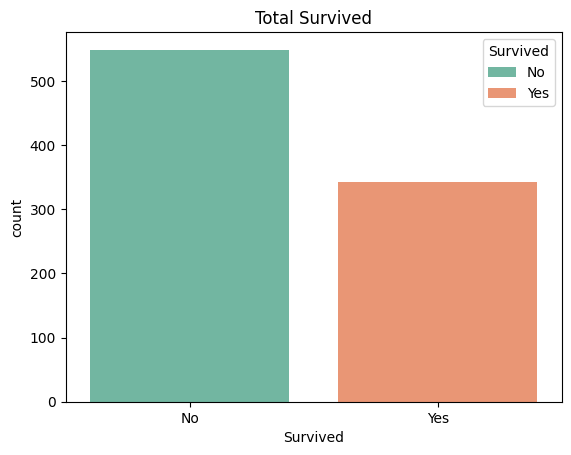

In [18]:
ax = sns.countplot(x='Survived', hue='Survived', data=df, palette='Set2', legend=True)
plt.title('Total Survived')
plt.show()

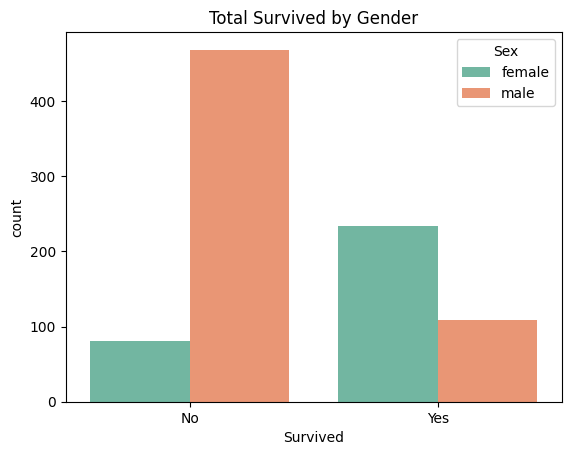

In [19]:
ax = sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2', legend=True)
plt.title('Total Survived by Gender')
plt.show()

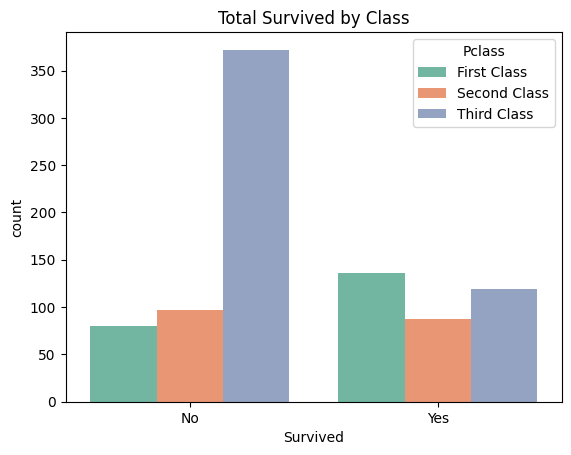

In [20]:
ax = sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set2', legend=True)
plt.title('Total Survived by Class')
plt.show()

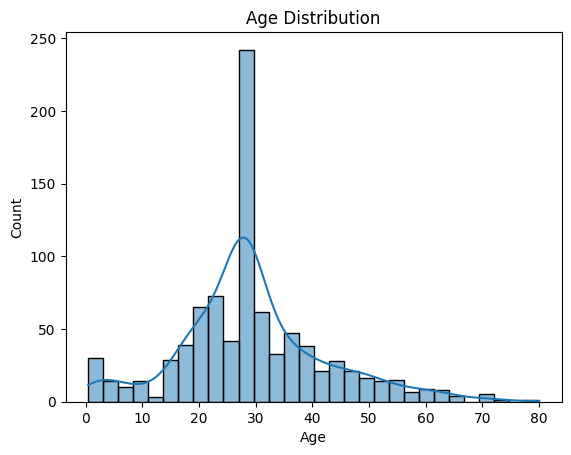

In [21]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

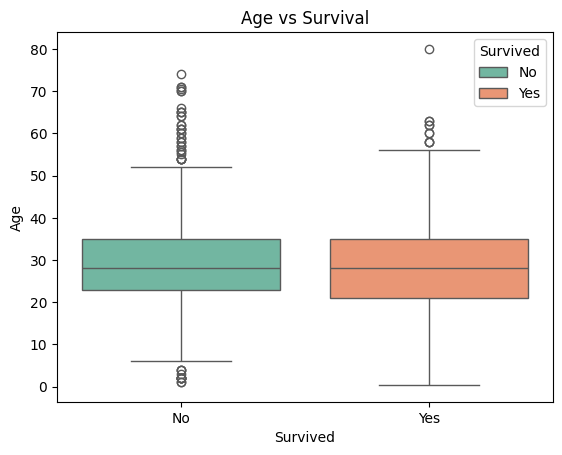

In [22]:
sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, palette='Set2', legend=True)
plt.title('Age vs Survival')
plt.show()

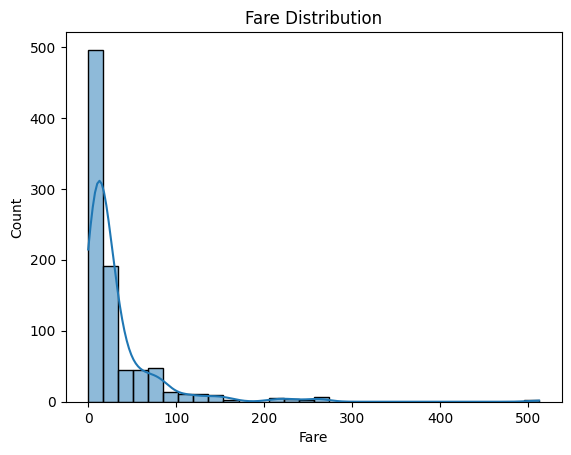

In [23]:
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

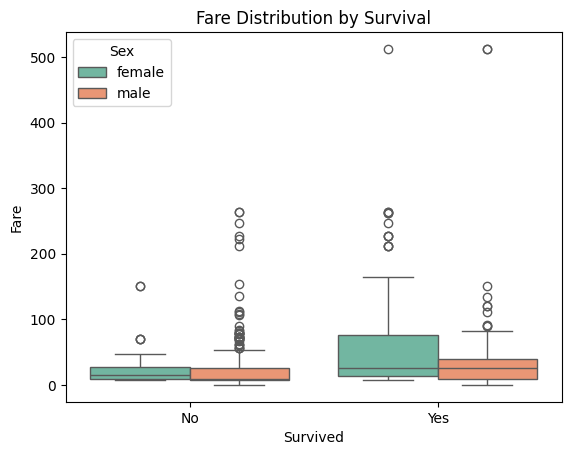

In [24]:
sns.boxplot(x='Survived', y='Fare', hue='Sex', data=df, palette='Set2')
plt.title('Fare Distribution by Survival')
plt.show()

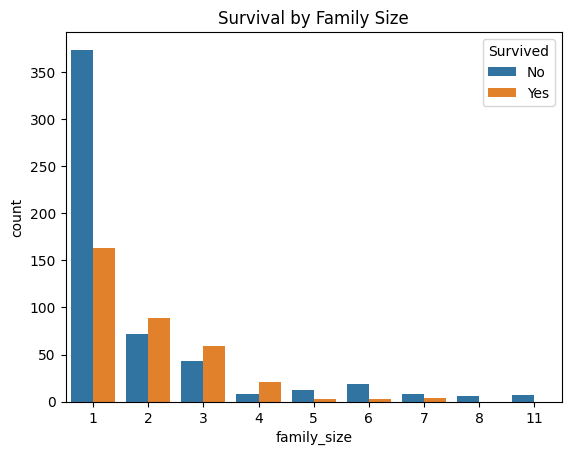

In [25]:
df['family_size'] = df['SibSp'].astype(int) + df['Parch'].astype(int) + 1
sns.countplot(x='family_size', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.show()

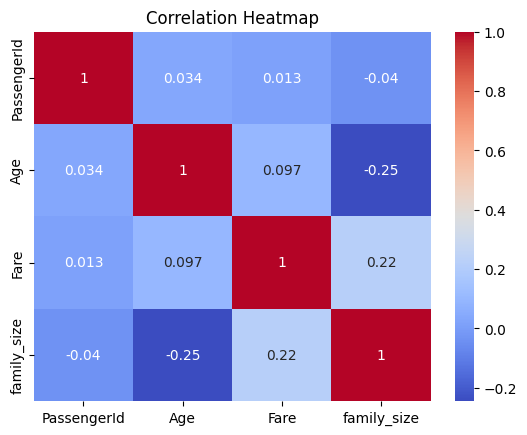

In [26]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

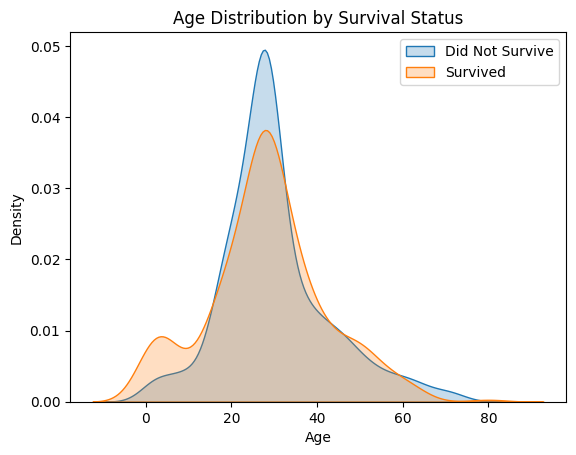

In [27]:
sns.kdeplot(data=df[df['Survived'] == 'No'], x='Age', label='Did Not Survive', fill=True)
sns.kdeplot(data=df[df['Survived'] == 'Yes'], x='Age', label='Survived', fill=True)
plt.legend()
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

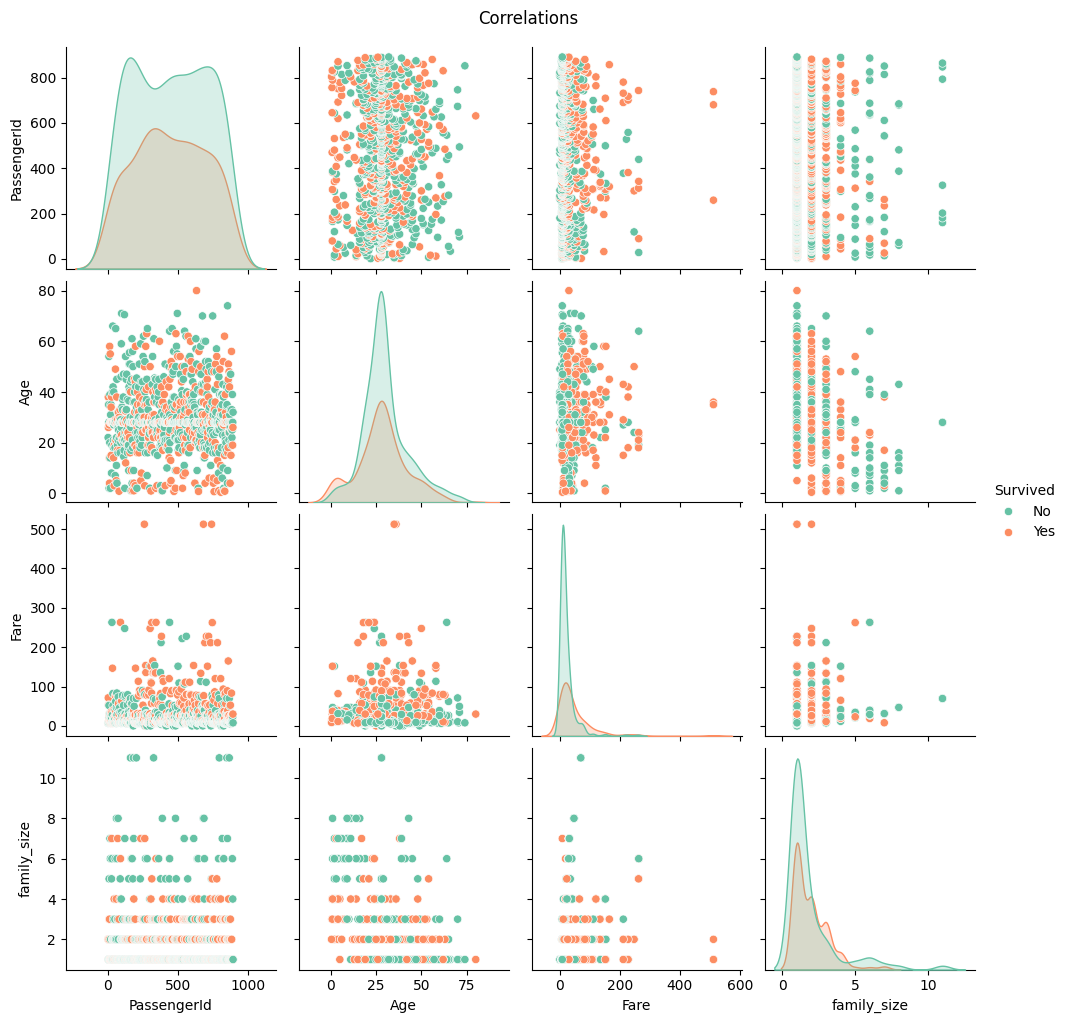

In [28]:
sns.pairplot(df, hue='Survived', diag_kind='kde', palette='Set2')
plt.suptitle('Correlations', y=1.02)
plt.show()

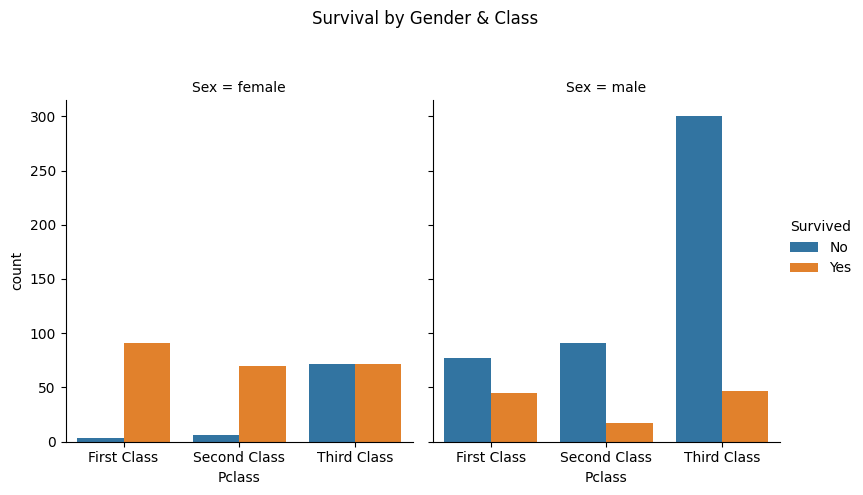

In [29]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df, height=5, aspect=0.8, legend=True)
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Gender & Class')
plt.show()

In [30]:
Gender_Survival = df.groupby('Sex', observed=True)['Survived'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
Gender_Survival.rename(columns={'Survived': 'Survival_rate'}, inplace=True)
print('\nSurvival Rate by Gender:\n', Gender_Survival)


Survival Rate by Gender:
       Sex  Survival_rate
0  female      74.203822
1    male      18.890815


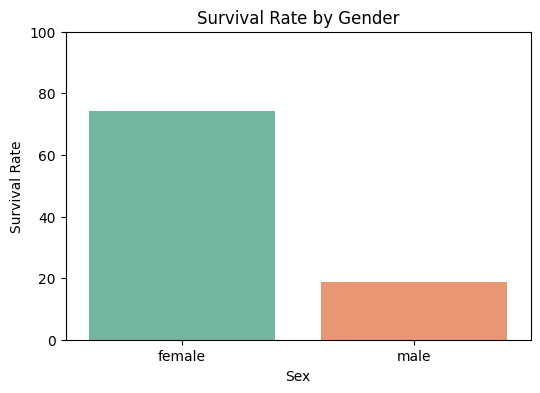

In [31]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survival_rate', hue='Sex', data=Gender_Survival, palette='Set2')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 100)
plt.show()

In [32]:
Class_Survival = df.groupby('Pclass', observed=True)['Survived'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
Class_Survival.rename(columns={'Survived':'Survival_Rate'}, inplace=True)
print('\nSurvival Rate by Passenger Class:\n', Class_Survival)


Survival Rate by Passenger Class:
          Pclass  Survival_Rate
0   First Class      62.962963
1  Second Class      47.282609
2   Third Class      24.236253


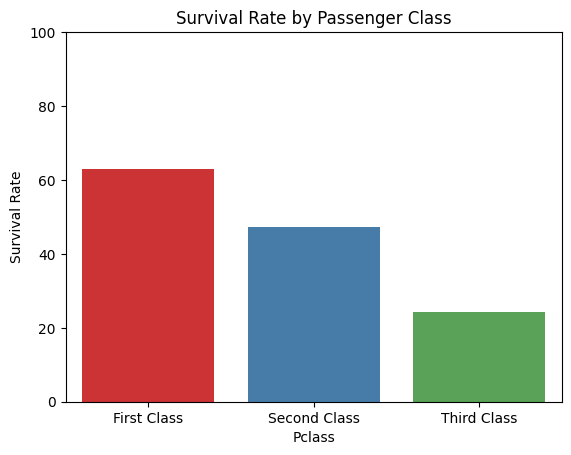

In [33]:
sns.barplot(x='Pclass', y='Survival_Rate', hue='Pclass', data=Class_Survival, palette='Set1')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0,100)
plt.show()

In [34]:
Gender_Class_Survival = df.groupby(['Sex','Pclass'], observed=True)['Survived'].apply(lambda x: (x == 'Yes').mean() * 100).unstack()
print('\nSurvival Rate by Gender & Class:\n', Gender_Class_Survival)


Survival Rate by Gender & Class:
 Pclass  First Class  Second Class  Third Class
Sex                                           
female    96.808511     92.105263    50.000000
male      36.885246     15.740741    13.544669


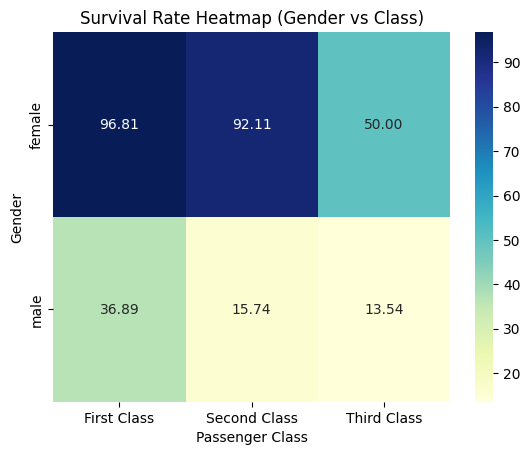

In [35]:
sns.heatmap(Gender_Class_Survival, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Survival Rate Heatmap (Gender vs Class)')
plt.ylabel('Gender')
plt.xlabel('Passenger Class')
plt.show()

In [36]:
bins = [0, 12, 59, 80]
labels = ['Child', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [37]:
Age_Gender_Survival = df.groupby(['Age_Group', 'Sex'], observed=True)['Survived']\
                     .apply(lambda x: (x == 'Yes').mean() * 100).unstack()
print('\nSurvival Rate by Age Group & Gender:\n', Age_Gender_Survival)


Survival Rate by Age Group & Gender:
 Sex            female       male
Age_Group                       
Child       59.375000  56.756757
Adult       75.539568  16.409266
Senior     100.000000  13.636364


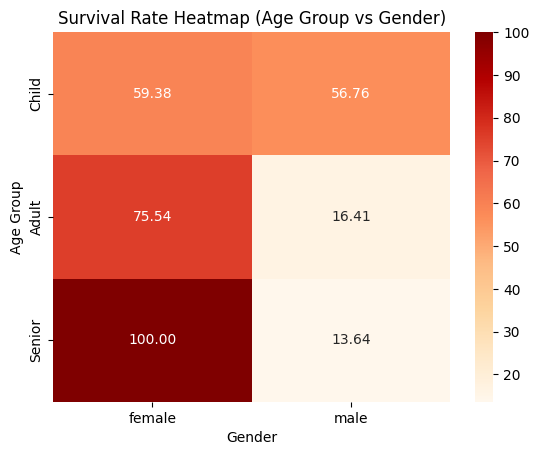

In [38]:
sns.heatmap(Age_Gender_Survival, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Survival Rate Heatmap (Age Group vs Gender)')
plt.ylabel('Age Group')
plt.xlabel('Gender')
plt.show()